# Lecture 21:  Neural Nets
## CMSE 381 - Spring 2024



<img src="https://upload.wikimedia.org/wikipedia/commons/3/30/Multilayer_Neural_Network.png" alt="Multilayer Neural Net" width="400"/>

In [1]:
# Everyone's favorite standard imports
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import time

from sklearn.model_selection import train_test_split


Today we are going to build some basic neural nets using [pytorch](https://pytorch.org/).

This lecture makes use of many helpful available tutorials, including those listed below:

- https://pytorch.org/tutorials/beginner/basics/quickstart_tutorial.html
- https://pythonprogramming.net/data-deep-learning-neural-network-pytorch/?completed=/introduction-deep-learning-neural-network-pytorch/
- https://towardsdatascience.com/building-neural-network-using-pytorch-84f6e75f9a
- https://github.com/amitrajitbose/handwritten-digit-recognition/



# Get up and running

Your first job is to get `pytorch` running on your machine. 

## If you're on jupyterhub......
You need to switch your kernel environment to `conda_pytorch`. See the figure below. Then `torch` should already be installed, no more work to be done. 

<img src="https://imgur.com/lV60kph.png" alt="Jupyter hub switching to pytorch environment" width="400"/>

## If you're on a local machine......
Your first job is to install pytorch.
```bash
pip install torch
```

We will also be using some example data sets found in the following package. 
```bash
pip install torchvision
```

## Either way.....
If all goes well, the imports below should work. 

In [2]:
import torch
from torch import nn
import torch.optim as optim
# import torch.trainloader
import torch
import numpy as np
from torch.utils.data import TensorDataset, DataLoader

Our first job is to build our chosen architecture. One of the simplest ways to do this is with the `nn.Sequential` class.  All we need to do is to pass information about what we want to do at each step. The following code builds a neural network with:
- Input of two variables $(X_1,X_2)$, so $p=2$
- A first hidden layer with 5 units, where we take linear combinations of the inputs and then use the ReLU activation function. 
- A second hidden layer with 3 units, this time using the Sigmoid activation function
- A final output layer

In [3]:
# Hyperparameters for our network
input_size = 2
hidden_sizes = [5,3]
output_size = 1

# Build a feed-forward network
model = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[0], hidden_sizes[1]),
                      nn.Sigmoid(),
                      nn.Linear(hidden_sizes[1], output_size))
print(model)

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): ReLU()
  (2): Linear(in_features=5, out_features=3, bias=True)
  (3): Sigmoid()
  (4): Linear(in_features=3, out_features=1, bias=True)
)


Note at this point that we haven't trained anything or used data in any way.  This is only the setup. This is like when we were doing linear regression, and we have `linreg = LinearRegression()` but we hadn't done `linreg.fit(X,y)` yet. 


&#9989; **<font color=red>Do this:</font>** Write code to build an architecture with the following specifications:
- $p=20$ input variables
- Three hidden layers, with 10, 5, and 3 units respectively.
- Use the ReLU activation function at every step.

Note you're not training the model, just setting up the architecture.

In [12]:
# Your code here

# Hyperparameters for our network
input_size = 20
hidden_sizes = [10,5,3]
output_size = 1

# Build a feed-forward network
model = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[0], hidden_sizes[1]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[1], hidden_sizes[2]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[2], output_size))

print(model)

Sequential(
  (0): Linear(in_features=20, out_features=10, bias=True)
  (1): ReLU()
  (2): Linear(in_features=10, out_features=5, bias=True)
  (3): ReLU()
  (4): Linear(in_features=5, out_features=3, bias=True)
  (5): ReLU()
  (6): Linear(in_features=3, out_features=1, bias=True)
)


# Building the simple architecture from the lecture
<img src="https://imgur.com/kO6zuGG.jpg" alt="Example Neural Net from Class" width="400"/>

&#9989; **<font color=red>Do this:</font>** Build the model for the example we used in the class, with the picture included above. This model had two input variables, three hidden units in a single layer, and a single output. Use ReLU for your activation function. Save your model as `mySecondNN`. 

In [13]:
# Your code here.
# Hyperparameters for our network
input_size = 2
hidden_sizes = [3]
output_size = 1

# Build a feed-forward network
mySecondNN = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[0], output_size))
print(mySecondNN)

Sequential(
  (0): Linear(in_features=2, out_features=3, bias=True)
  (1): ReLU()
  (2): Linear(in_features=3, out_features=1, bias=True)
)


Here is our very simple data set to use. It's similar to the data set from last time, just with way more data points.

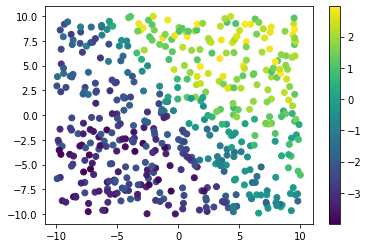

In [14]:
data = np.loadtxt('../../DataSets/DL-toy-data-bigger.csv')
X = data[:,:2]
y = data[:,2]

plt.scatter(X[:,0],X[:,1], c= y)
plt.colorbar()

I'm going to build a train/test split before getting into the `pytorch` framework.  I know there are better internal ways to do this with pure `pytorch`, but unfortunately they aren't working for me at the moment. 

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 42)

I need to convert my input data to `pytorch`'s fancy data loader class. The first step is to conver our numpy arrays to torch Tensors, but for our purposes, you can think of this as just being a different way of storing an array. This code isn't pretty and I bet there are better ways to handle the inputs, but it works. 

In [16]:
X_train_tensor = torch.Tensor(X_train)
y_train_tensor = torch.Tensor(y_train)
X_test_tensor  = torch.Tensor(X_test)
y_test_tensor  = torch.Tensor(y_test)

mydata_train = TensorDataset(X_train_tensor,y_train_tensor)
mydata_test  = TensorDataset(X_test_tensor,y_test_tensor)

trainloader = torch.utils.data.DataLoader(mydata_train, batch_size=10, shuffle=True)
testloader = torch.utils.data.DataLoader(mydata_test, batch_size=10, shuffle=True)

Essentially, the `trainloader` and `testloader` are now storing our data sets. The `batch_size` input is to allow for only loading in a subset of our data at a time. For our silly little data set, this doesn't particularly matter. However, for real data sets with gigabytes of data, the batch size makes it so that we don't overload the memory of the computer trying to read in the whole data set at once. 

Below, we can see that if we iterate over `trainloader`, we are handed 10 data points at a time, with their `X` and `y` information separated

In [17]:
for data_x,data_y in trainloader:
    print(data_x)
    print(data_y)
    print('---')
    break #<---- Uncomment to only show a single output of the iteration

tensor([[ 7.0721,  7.7890],
        [ 5.0204,  8.5442],
        [ 6.5979,  9.3657],
        [-1.8552, -5.3553],
        [ 8.1311,  5.4809],
        [ 2.1450, -0.4471],
        [-9.0639,  9.4146],
        [ 2.5796,  7.4530],
        [ 9.2733, -2.3312],
        [-6.3770,  5.7709]])
tensor([ 2.6598,  2.4154,  1.5841, -3.5364,  1.0379, -0.5269, -1.7068,  1.4023,
         0.0844, -2.9143])
---


Now for the actual training of the model. We are not covering the inner workings of the training in class, so for the purposes of today you don't need to worry much about the specifics here.  However, the basic idea is that `epochs` gives us the number of times we're willing to update our coefficients to see if we're improving. "Improving" is measured by the loss function, in this case chosen to be `nn.MSELoss` which uses mean squared error. 

The code below will run over multiple epochs, and print out the training loss at each step.

In [18]:
%time 

criterion = nn.MSELoss()# Optimizers require the parameters to optimize and a learning rate
optimizer = optim.SGD(mySecondNN.parameters(), lr=0.003)
epochs = 15
for e in range(epochs):
    running_loss = 0
    for data, target in trainloader:
    
        # Training pass
        optimizer.zero_grad()
        
        output = mySecondNN(data) #<--- note this line is using the model you set up at the beginning of this section
        output = output.float()
        target = target.float()
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
    else:
        print(f"Training loss: {running_loss/len(trainloader)}")

Wall time: 0 ns


C:\Users\areeb\anaconda3\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([10])) that is different to the input size (torch.Size([10, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
C:\Users\areeb\anaconda3\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([5])) that is different to the input size (torch.Size([5, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Training loss: 4.805793398304989
Training loss: 4.51699519784827
Training loss: 4.454129062200847
Training loss: 4.483767063994157
Training loss: 4.457438130127756
Training loss: 4.503378824183815
Training loss: 4.52667520548168
Training loss: 4.454908879179704
Training loss: 4.4865139660082365
Training loss: 4.443428635597229
Training loss: 4.44165985835226
Training loss: 4.4230308250377055
Training loss: 4.434657178427043
Training loss: 4.422551186461198
Training loss: 4.462287745977703


For a more realistic data set, we'd be looking for the training loss to be improving over time.  In our case, it's relatively stagnant since there isn't much work to be done for our particular data set.
Note we can then predict on our test set to see how well we are doing.

In [19]:
predict = mySecondNN(X_test_tensor)

criterion(predict,y_test_tensor)

C:\Users\areeb\anaconda3\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([125])) that is different to the input size (torch.Size([125, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


tensor(4.2174, grad_fn=<MseLossBackward0>)

Of course, this data set is very tiny, with not much to be done in terms of training, so lets go look at a bigger data set. 

# MNIST data set

Now that we know the basics, we can build a neural net like discussed in class on the MNIST data set. The first time you run the commands below, it will save the MNIST data set into a folder called `MNIST` in the same place you're running this jupyter notebook. After that, it will just reload the data from that folder as long as it hasn't moved.

In [20]:
from torchvision import transforms, datasets

train = datasets.MNIST('', train=True, download=True,
                       transform=transforms.Compose([
                           transforms.ToTensor()
                       ]))

test = datasets.MNIST('', train=False, download=True,
                       transform=transforms.Compose([
                           transforms.ToTensor()
                       ]))

100%|██████████| 9912422/9912422 [00:02<00:00, 3890592.81it/s]


Extracting MNIST\raw\train-images-idx3-ubyte.gz to MNIST\raw


100%|██████████| 28881/28881 [00:00<00:00, 1845877.24it/s]


Extracting MNIST\raw\train-labels-idx1-ubyte.gz to MNIST\raw




 20%|█▉        | 327680/1648877 [00:00<00:00, 3013760.99it/s]

100%|██████████| 1648877/1648877 [00:00<00:00, 2687688.98it/s]


Extracting MNIST\raw\t10k-images-idx3-ubyte.gz to MNIST\raw



100%|██████████| 4542/4542 [00:00<?, ?it/s]

Extracting MNIST\raw\t10k-labels-idx1-ubyte.gz to MNIST\raw



In [21]:
print('---Train---\n')
print(train)
print('\n---Test---\n')

print(test)

---Train---

Dataset MNIST
    Number of datapoints: 60000
    Root location: 
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
           )

---Test---

Dataset MNIST
    Number of datapoints: 10000
    Root location: 
    Split: Test
    StandardTransform
Transform: Compose(
               ToTensor()
           )


As before, we are loading in our data set in batches to keep from crashing your memory. 

In [22]:
trainloader = torch.utils.data.DataLoader(train, batch_size=10, shuffle=True)
testloader = torch.utils.data.DataLoader(test, batch_size=10, shuffle=False)

Let's take a look at our data. The following code lets me spit out the first batch of data.

In [23]:
for images, labels in trainloader:
    print(images)
    print(labels)
    break


tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0.

Note that `images` is a tensor of input data points from the first batch, while `labels` is a tensor of the labels.

In [24]:
labels

tensor([7, 9, 7, 3, 4, 9, 9, 4, 1, 9])

This data happens to be from images of digits, so we can visualize each input data point and its label as follows. Mess around with the `i` value to see different data points in this batch.

Text(0.5, 1.0, 'This is a 7')

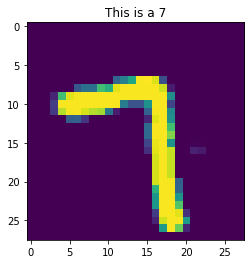

In [30]:
i = 0 #<---- this number can be from 0 to 9, and will show different data points
      #      Notice that the index i is not the same as the label of the integer in the pic.

X = images[i]
y = labels[i].item()

plt.imshow(X.view(28,28))
plt.title('This is a ' + str(y))

For our data set, we will simply flatten each image into a vector to pass into the neural network.  That means that because each image is $28 \times 28$ pixels, we will end up with a flattened data point of size 784. The code below is taking each image from the batch, flattening it to a vector, and returning the 10 data points in the batch as below

In [31]:
images_flat = images.view(images.shape[0], -1)
print(images_flat)
print(images_flat.shape)

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])
torch.Size([10, 784])


Ok, so now we can actually train our model on MNIST! 

&#9989; **<font color=red>Do this:</font>** For the code below, sketch the diagram for the model we've built. 

In [32]:
input_size = 784
hidden_sizes = [128, 64]
output_size = 10

model = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[0], hidden_sizes[1]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[1], output_size),
                      nn.LogSoftmax(dim=1))

print(model)

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): LogSoftmax(dim=1)
)


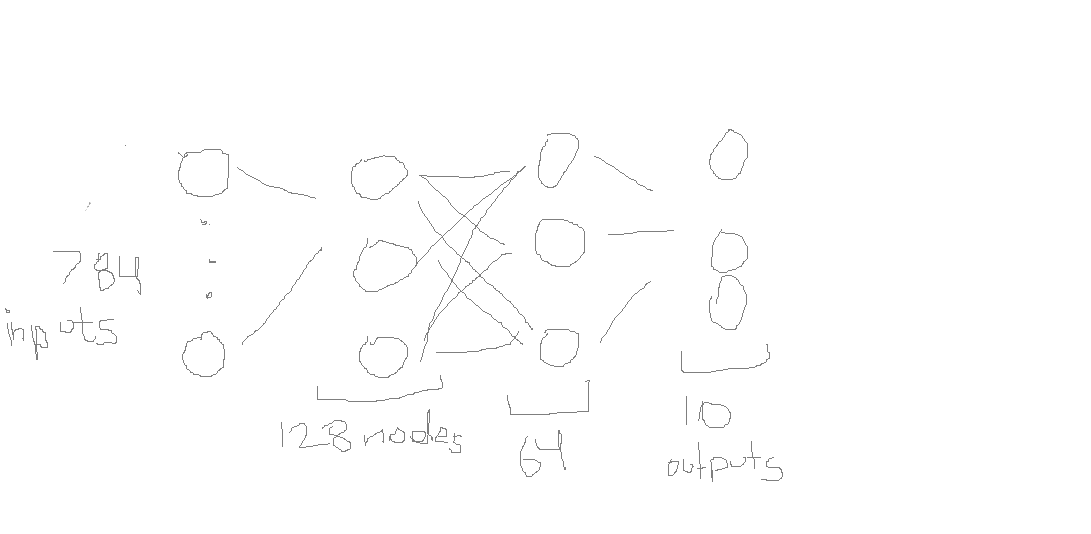

Now you can run the code below to train your model! 

**<font color=red>Warning:</font>** This code can be pretty slow.  On my desktop, it took about 3 minutes.  You can try things like increasing the number of epochs, but note that this will also increase the running time. 

In [33]:
%%time 


# Define the loss
criterion = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr=0.003)

epochs = 5
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        # Flatten MNIST images into a 784 long vector
        images = images.view(images.shape[0], -1)
    
        # Training pass
        optimizer.zero_grad()
        
        output = model(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
    else:
        print(f"Training loss: {running_loss/len(trainloader)}")

Training loss: 1.1618191216463845
Training loss: 0.3872172319430392
Training loss: 0.31619366302962104
Training loss: 0.2771838831435889
Training loss: 0.2469343346253348
Wall time: 3min 9s


We can then look at what sorts of predictions we have for new data points. 

In [34]:
# This function is just for drawing.  As with the rest of this 
# tutorial, the code is adapted heavily from 
# https://github.com/amitrajitbose/handwritten-digit-recognition 

def view_classify(img, ps):
    ''' Function for viewing an image and it's predicted classes.
    '''
    ps = ps.data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    ax2.set_yticklabels(np.arange(10))
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)
    plt.tight_layout()



The code below will show the image, and the probabilities for each class label. The actual prediction comes from the label with the highest probability.

Predicted Digit = 4


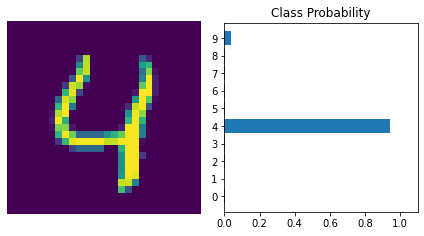

In [35]:
i = 4 #<--- Mess with this number to see different data points and their predictions

images, labels = next(iter(testloader))

img = images[i].view(1, 784)
with torch.no_grad():
    logps = model(img)

ps = torch.exp(logps)
probab = list(ps.numpy()[0])
print("Predicted Digit =", probab.index(max(probab)))
view_classify(img.view(1, 28, 28), ps)
# plt.savefig('MNIST-ExamplePrediction.png',bbox_inches = 'tight')

The code below will show the count  of correct predictions. 

In [36]:
correct_count, all_count = 0, 0
for images,labels in testloader:
  for i in range(len(labels)):
    img = images[i].view(1, 784)
    # Turn off gradients to speed up this part
    with torch.no_grad():
        logps = model(img)

    # Output of the network are log-probabilities, 
    # need to take exponential for probabilities
    ps = torch.exp(logps)
    probab = list(ps.numpy()[0])
    pred_label = probab.index(max(probab))
    true_label = labels.numpy()[i]
    if(true_label == pred_label):
      correct_count += 1
    all_count += 1

print("Number Of Images Tested =", all_count)
print("\nModel Accuracy =", (correct_count/all_count))



Number Of Images Tested = 10000

Model Accuracy = 0.9332


In [37]:
import numpy as np

from scipy.special import softmax

In [38]:
x = np.array([1, 4,2,-2])
m = softmax(x)
m

array([0.04192238, 0.84203357, 0.11395685, 0.00208719])